# Question 4

An article in Quality and Reliability Engineering Internation presents a $2^5$ factorial design. The experiment is shown in the following table: 

In [2]:
A <- rep(c(-1, 1), 16)
B <- rep(c(-1, -1, 1, 1), 8)
C <- rep(c(-1, -1, -1, -1, 1, 1, 1, 1), 4)
D <- rep(c(-1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1), 2)
E <- c(
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
)
y <- c(
    08.11, 05.56, 05.77, 05.82, 09.17, 07.80, 03.23, 05.69,
    08.82, 14.23, 09.20, 08.94, 08.68, 11.49, 06.25, 09.12,
    07.93, 05.00, 07.47, 12.00, 09.86, 03.65, 06.40, 11.61,
    12.43, 17.55, 08.87, 25.38, 13.06, 18.85, 11.78, 26.05
)
data <- data.frame(A, B, C, D, E, y)
t(data)

A,-1.00,1.00,-1.00,1.00,-1.00,1.0,-1.00,1.00,-1.00,1.00,...,-1.0,1.00,-1.00,1.00,-1.00,1.00,-1.00,1.00,-1.00,1.00
B,-1.00,-1.00,1.00,1.00,-1.00,-1.0,1.00,1.00,-1.00,-1.00,...,1.0,1.00,-1.00,-1.00,1.00,1.00,-1.00,-1.00,1.00,1.00
C,-1.00,-1.00,-1.00,-1.00,1.00,1.0,1.00,1.00,-1.00,-1.00,...,1.0,1.00,-1.00,-1.00,-1.00,-1.00,1.00,1.00,1.00,1.00
D,-1.00,-1.00,-1.00,-1.00,-1.00,-1.0,-1.00,-1.00,1.00,1.00,...,-1.0,-1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
E,-1.00,-1.00,-1.00,-1.00,-1.00,-1.0,-1.00,-1.00,-1.00,-1.00,...,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
y,8.11,5.56,5.77,5.82,9.17,7.8,3.23,5.69,8.82,14.23,...,6.4,11.61,12.43,17.55,8.87,25.38,13.06,18.85,11.78,26.05


**a)** Analyze the data from this experiment. Identify the significant factors and interactions and remocing the non-significant terms, when appropriate.

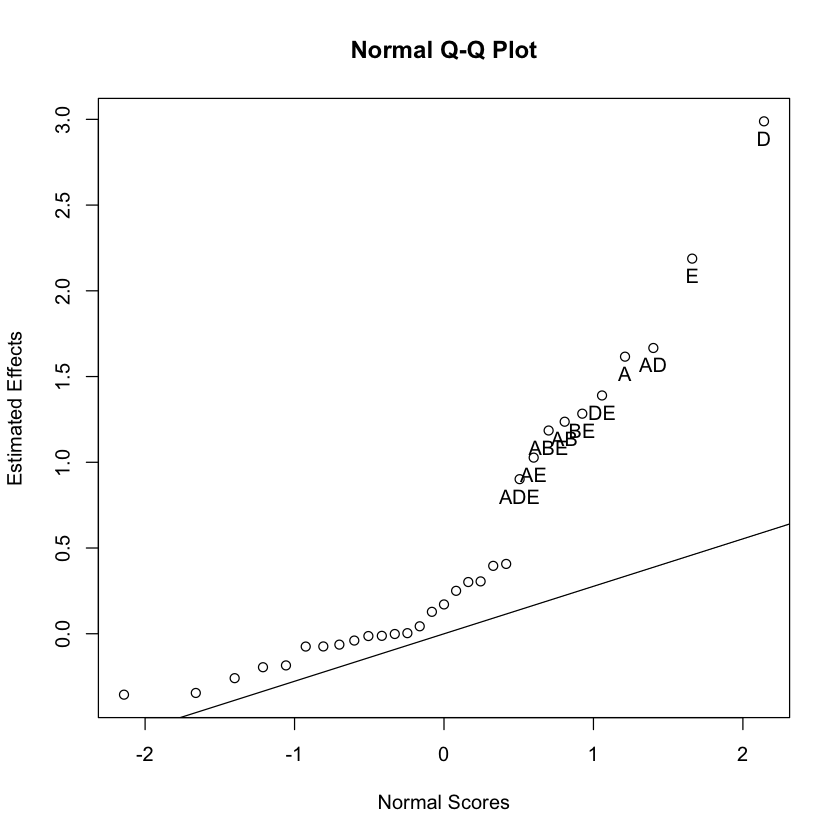

In [5]:
model <- lm(y ~ A*B*C*D*E, data = data)
library(daewr)
fullnormal(coef(model)[-1], alpha = 0.025)

$C$ is not significant and if not part of any significant interactions. $B$ is not significant but it has significant interactinos, so we will keep it in.

In [7]:
aov1 <- aov(y~ A*B*D*E, data = data)
summary(aov1)

            Df Sum Sq Mean Sq F value   Pr(>F)    
A            1  83.56   83.56  57.233 1.14e-06 ***
B            1   0.06    0.06   0.041 0.841418    
D            1 285.78  285.78 195.742 2.16e-10 ***
E            1 153.17  153.17 104.910 1.97e-08 ***
A:B          1  48.93   48.93  33.514 2.77e-05 ***
A:D          1  88.88   88.88  60.875 7.66e-07 ***
B:D          1   0.01    0.01   0.004 0.950618    
A:E          1  33.76   33.76  23.126 0.000193 ***
B:E          1  52.71   52.71  36.103 1.82e-05 ***
D:E          1  61.80   61.80  42.328 7.24e-06 ***
A:B:D        1   3.82    3.82   2.613 0.125501    
A:B:E        1  44.96   44.96  30.794 4.40e-05 ***
A:D:E        1  26.01   26.01  17.815 0.000650 ***
B:D:E        1   0.05    0.05   0.035 0.854935    
A:B:D:E      1   5.31    5.31   3.634 0.074735 .  
Residuals   16  23.36    1.46                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Now, create a new model by removing the insignificant interactions. 

In [8]:
aov2 <- aov(y ~ A*B*D*E -  B:D - A:B:D - B:D:E - A:B:D:E, data = data)
summary(aov2)

            Df Sum Sq Mean Sq F value   Pr(>F)    
A            1  83.56   83.56  51.362 6.10e-07 ***
B            1   0.06    0.06   0.037 0.849178    
D            1 285.78  285.78 175.664 2.30e-11 ***
E            1 153.17  153.17  94.149 5.24e-09 ***
A:B          1  48.93   48.93  30.076 2.28e-05 ***
A:D          1  88.88   88.88  54.631 3.87e-07 ***
A:E          1  33.76   33.76  20.754 0.000192 ***
B:E          1  52.71   52.71  32.400 1.43e-05 ***
D:E          1  61.80   61.80  37.986 5.07e-06 ***
A:B:E        1  44.96   44.96  27.635 3.82e-05 ***
A:D:E        1  26.01   26.01  15.988 0.000706 ***
Residuals   20  32.54    1.63                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

**b)** One of the factors from this experiment does not seem to be important. If you drop this factor, what type of design remains? Analyze the data using the full factorial model for only the four active factors, including model adequacy checking.


	Shapiro-Wilk normality test

data:  residuals
W = 0.97507, p-value = 0.6491


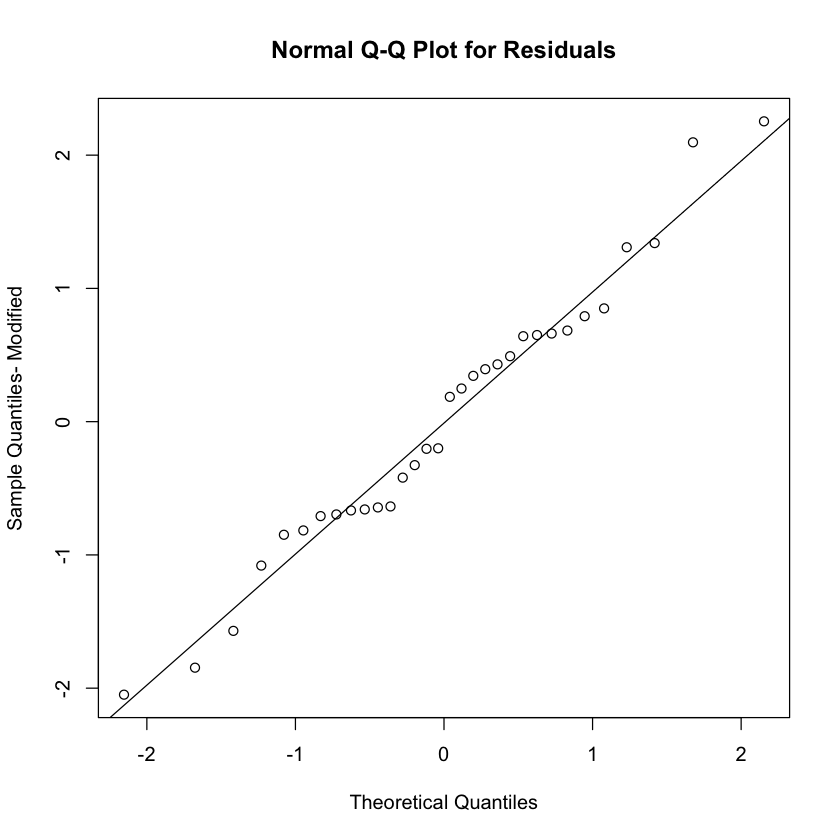

In [9]:
residuals <- aov2$residuals

qqnorm(residuals, ylim=c(min(residuals),max(residuals)), main = "Normal Q-Q Plot for Residuals",
       xlab = "Theoretical Quantiles", ylab = "Sample Quantiles- Modified",
       plot.it = TRUE, datax = FALSE)

qqline(residuals, datax = FALSE, distribution = qnorm)
#Test normality using Shapiro Wilks
shapiro.test(residuals)

**c)** Find the settings of the active factors that maximize the predicted response.